# Open Government Data, Canton Zurich

### **Dataset**: Beiträge der Kulturförderung der Stadt Uster ab 2018

### **Description**: Sämtliche Beiträge der Kulturförderung der Stadt Uster ab 2018. Daten enthalten: 'Gesuchsteller', 'Projekts', 'Förderbereich', 'Förderart' und 'Förderbetrag'. Grundlage der Förderung bildet das Reglement Kulturförderung der Stadt Uster (siehe unter "Weitere Informationen").

*Autogenerated Jupyter Notebook and basic Python code for data set* **721@geschaeftsfeld-gesellschaft-stadt-uster**.

## Dataset profile
- **Issued** `2021-07-06T00:00:00`
- **Modified** `2022-10-30T07:19:04`
- **Startdate** `2018-01-01`
- **Enddate** `None`
- **Theme** `['Kultur, Medien, Informationsgesellschaft, Sport']`
- **Keyword** `['film', 'kultur', 'kulturfoerderung', 'kunst', 'museen', 'musik', 'theater', 'gemeinwesen', 'ogd']`
- **Publisher** `['Geschäftsfeld Gesellschaft der Stadt Uster']`
- **Landingpage** `https://github.com/GesellschaftStadtUster/kultur_foerderbeitrage`


## Import Python modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [2]:
# Distribution 0
# Ktzhdistid               : 1853
# Title                    : Tabelle der Fördergesuche der Kulturförderung der Stadt Uster
# Description              : Variabeln: 'DatumEntscheid' = Datum der Beschlussfassung über das Gesuch, bei Leistungskontrakten der Auszahlung, 'Gesuchsteller' = Bezeichnung des Gesuchstellers gemäss Fördergesuch, 'Projekt' = Bezeichnung des geförderten Projekts, 'Foerderbereich' = Bezeichnung des Förderbereichs, 'Foerderart' = Bezeichnung der Förderart ('Projektbeitrag' oder 'Leistungskontrakt'), 'FoerderbeitragCHF' = Bewilligter Betrag.
# Issued                   : 2021-07-06T17:36:33
# Modified                 : 2021-11-23T21:12:49
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceRequired

df = pd.read_csv('https://raw.githubusercontent.com/GesellschaftStadtUster/kultur_foerderbeitrage/main/daten_kulturfoerderung_uster.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://raw.githubusercontent.com/GesellschaftStadtUster/kultur_foerderbeitrage/main/daten_kulturfoerderung_uster.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [3]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [4]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 268 rows (observations) and 6 columns (variables).
There seem to be 0 exact duplicates in the data.


In [5]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DatumEntscheid     268 non-null    object
 1   Gesuchssteller     268 non-null    object
 2   Projekt            268 non-null    object
 3   Foerderbereich     268 non-null    object
 4   Foerderart         268 non-null    object
 5   FoerderbeitragCHF  268 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 111.2 KB


In [6]:
df.head()

,DatumEntscheid,Gesuchssteller,Projekt,Foerderbereich,Foerderart,FoerderbeitragCHF
0,2018-02-22,Quartierverein Oberuster,Bachgassfest,Gemeinwesen,Projektbeitrag,5000
1,2018-02-22,Verein OpenAir für Uster,H2U-Sessions Winter-Frühling 18,Konzert & Theater,Projektbeitrag,2000
2,2018-02-22,Filacro,Kulturkaländer 2018,Konzert & Theater,Projektbeitrag,6000
3,2018-02-22,Verein OpenAir für Uster,H2U OpenAir 2018,Konzert & Theater,Projektbeitrag,25000
4,2018-02-22,must,Konzerte für Frühaufstehende,Konzert & Theater,Projektbeitrag,4000


In [7]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,83,76,125
DatumEntscheid,2019-05-27,2019-03-04,2020-02-17
Gesuchssteller,Kleinjogg Kulturverein,Gemeindeverein Nänikon,Künstlergruppe Uster
Projekt,2. Auflage «Kleinjogg Gedenkschrift»,Live im Klairs,Ausstellung 2020 (V21)
Foerderbereich,Konzert & Theater,Konzert & Theater,Bildende Kunst
Foerderart,Projektbeitrag,Projektbeitrag,Projektbeitrag
FoerderbeitragCHF,2000,1500,2500


In [8]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,DatumEntscheid,Gesuchssteller,Projekt,Foerderbereich,Foerderart
count,268,268,268,268,268
unique,65,172,214,8,5
top,2019-03-04,must,Leistungskontrakt,Konzert & Theater,Projektbeitrag
freq,18,6,36,215,200


In [9]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(include='number'))

,FoerderbeitragCHF
count,268.00
mean,"9,171.07"
std,"16,131.08"
min,400.00
25%,"1,800.00"
50%,"4,000.00"
75%,"10,000.00"
max,"110,000.00"


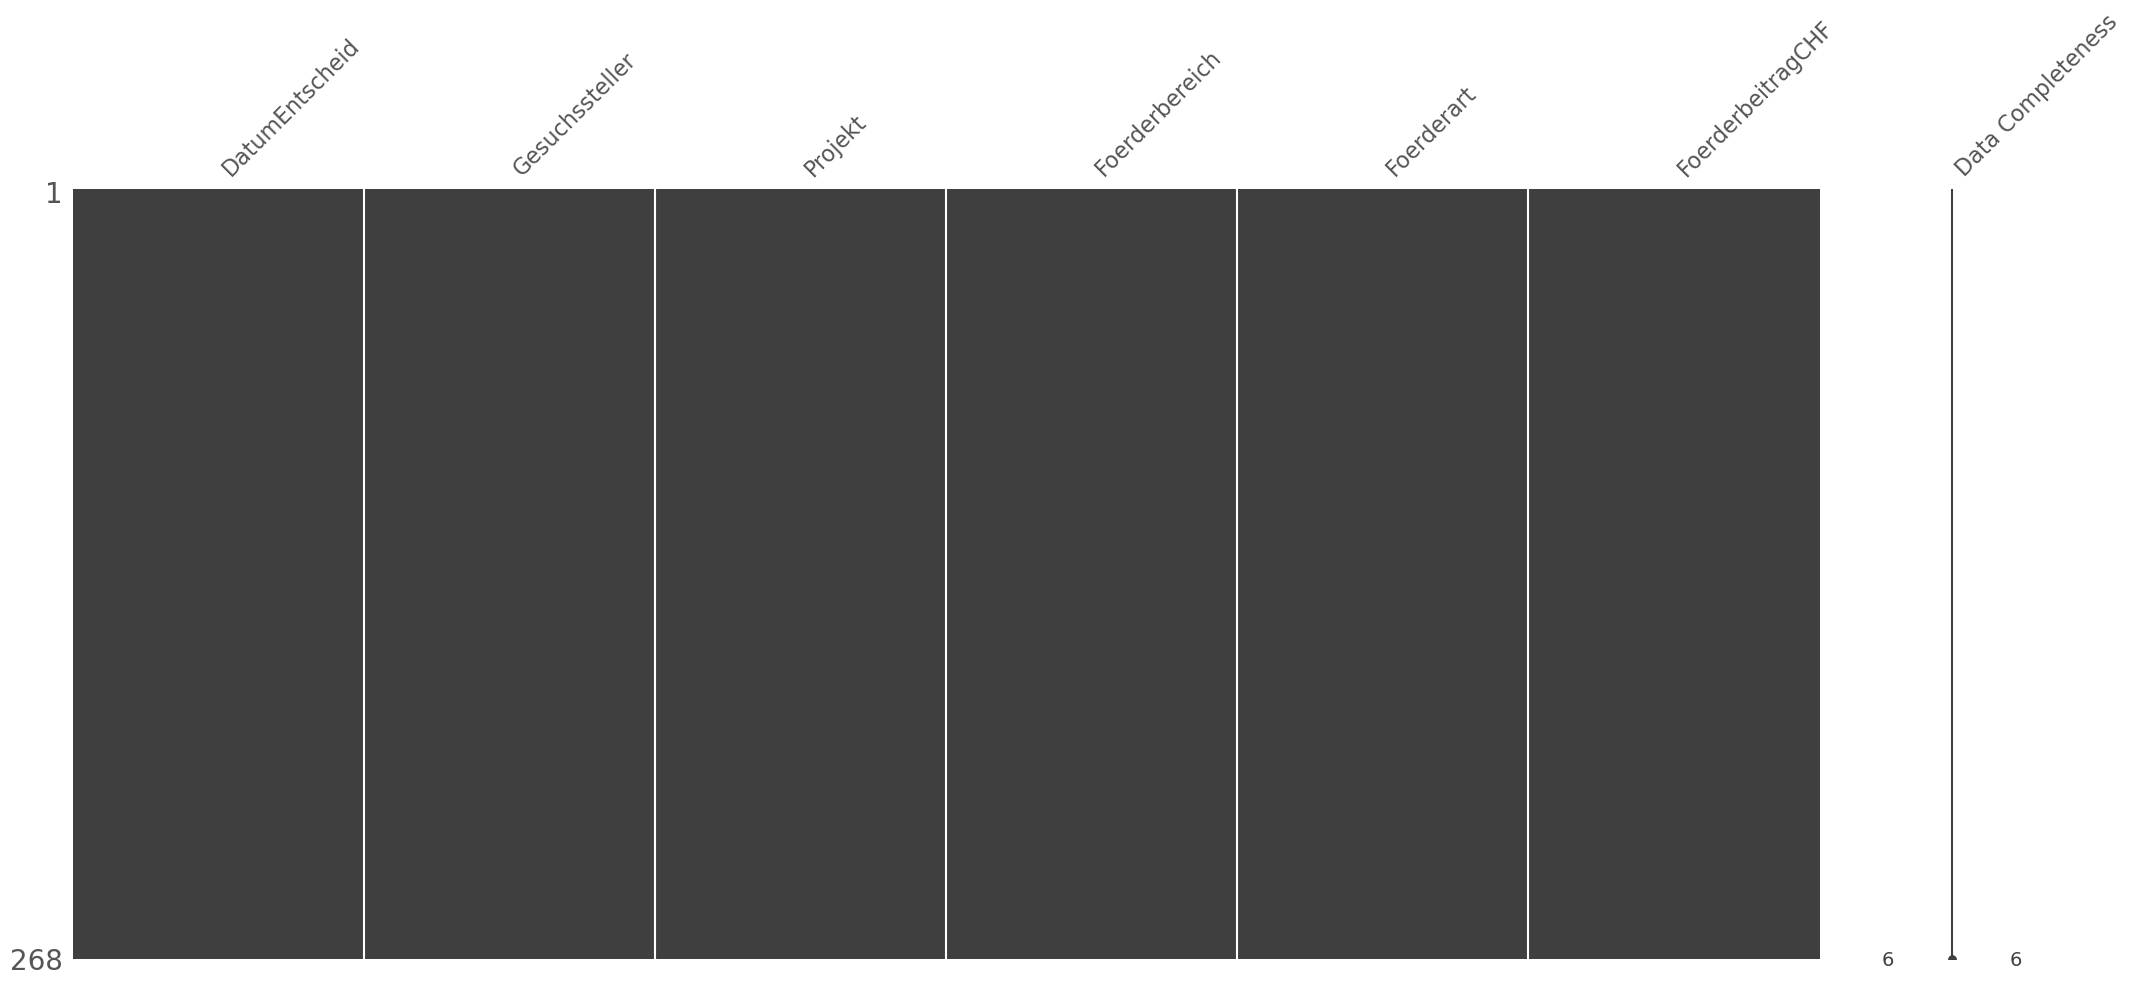

In [10]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

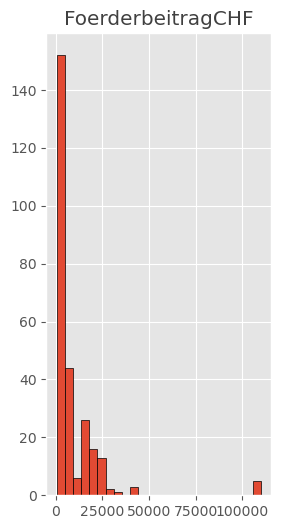

In [11]:
# plot a histogram for each numerical feature
df.hist(bins=25, layout=(-1, 5), edgecolor='black');

In [12]:
# continue your code here...

**Contact**: Geschäftsfeld Gesellschaft der Stadt Uster | Kulturförderung | Kultursekretariat@Uster.ch